# Download learning data
Jan2023 \
author: Inês Laranjeira

In [1]:
"""
IMPORTS
"""
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from brainbox.task.trials import find_trial_ids
from brainbox.behavior.training import get_sessions, get_training_status

In [2]:
#from one.api import ONE
#new_one = ONE().setup()

In [2]:
from one.api import ONE
#one = ONE(base_url='https://openalyx.internationalbrainlab.org')  # public database
one = ONE(base_url='https://alyx.internationalbrainlab.org')  # public database

/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/one/api.py:1465: UserWarning: Newer cache tables require ONE version 2.7 or greater
  warnings.warn(f'Newer cache tables require ONE version {min_version} or greater')


In [5]:
# --Get my functions
functions_path = "../Functions/"
os.chdir(functions_path)
from one_functions_generic import training_time, quartile

In [6]:
""" Download trials """
#trials = get_trials(training_protocol='training', mouse_project='ibl_neuropixel_brainwide_01')
data_path = "../DATA/"
os.chdir(data_path)
#pickle.dump(trials, open("trials_private_one", "wb"))
trials = pickle.load(open("trials_private_one", "rb"))

In [7]:
""" Calculate training time """
training_time = training_time(trials)
#data_path = '/home/ines/repositories/representation_learning_variability/DATA/'
#os.chdir(data_path)
#pickle.dump(training_time, open("training_time_private_one", "wb"))
#training_time_df = pickle.load(open("training_time_private_one", "rb"))

Problems with session:c6f62274-d303-473d-8bed-b8d1a51ab676
Problems with session:020e206a-9b47-4e05-8be8-00d656b372bd
Problems with session:933ada1e-299a-4b2e-a70c-61795230ec84
Problems with session:b9aa6cb1-33f1-4e5e-82cf-200ad0e4fe0a
Problems with session:7d223705-e2ad-4bc7-be88-34aa6b078656
Problems with session:06e51267-ac79-46cf-9eb2-213c9a133ff3
Problems with session:8dca0b11-bb26-46bf-ae03-e1c9e00c238c
Problems with session:26653213-289c-4a12-aa43-9b5e5dc5d141
Problems with session:906ef29d-1868-4b87-b83c-0e1b60b8e781
Problems with session:21f654bc-a8ad-41cc-8b2f-bba176d65d08
Problems with session:f616ed0c-385c-4806-9889-a12ecc8907ea
Problems with session:463eb86a-1f8b-4b7e-b16c-796870a81877
Problems with session:a5d8d1d8-df6d-4d0c-98eb-ae8df2bb0b34
Problems with session:0cac7e45-4bf2-43ec-8aa7-7786135db644
Problems with session:24654753-98ca-4edb-aa87-477e73e20087
Problems with session:b0b48278-b096-4514-ad18-1991abb9e8d2
Problems with session:b20e3138-beac-4129-9c6c-f00b2bcfc2

/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:469: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'trained 1a' in mouse_training_status.unique() or 'trained 1b' in mouse_training_status.unique():


Problems with session:8aedad93-00cb-4f10-ac04-f26020677e5a
Problems with session:b950d38e-88d2-487a-a4a0-597f895c1e2a
Problems with session:861b1863-783a-44be-a09f-997f3b93602b
Problems with session:3644e9b1-6e4d-4675-b819-efba09ecb5e8
Problems with session:804fd796-e650-4c4a-9c85-58a27a18f361
Problems with session:277404e9-2a92-427f-9375-7ea6bad760f9
Problems with session:e4d6120f-0c42-4019-960f-ec3e5d13c06f
Problems with session:ada1a97c-4e91-448c-9463-c94910a455a6
Problems with session:07f74000-866b-486c-bea5-c38867d94750
Problems with session:539a5cd4-2440-4884-b0e2-2a945db0b495
Problems with session:931256d2-43ca-4e15-9010-680e0521d085
Problems with session:2908b1fe-38b0-4582-b1e0-4cf8551254c5
Problems with session:ceef5cbb-3595-4263-b8c3-f9d0f6d7b2f0
Problems with session:95882746-17db-44d1-8d8e-05a522be8f22
Problems with session:004d3074-8a9a-4c3c-b51f-924b1e194a8e
Problems with session:01de7c6c-939b-4a3d-acec-8c7f8c46bc7f
Problems with session:e00bb611-160d-4a31-bb7a-9d2e9b18ae

In [9]:
data_path = '/home/ines/repositories/representation_learning_variability/DATA/'
os.chdir(data_path)
pickle.dump(training_time, open("training_time_private_one", "wb"))

In [10]:
""" Calculate quartiles"""
quantile_df = quartile(training_time, criterion='training_time')
data_path = '/home/ines/repositories/representation_learning_variability/DATA/'
os.chdir(data_path)
pickle.dump(quantile_df, open("quartile_private_one", "wb"))
#quartile_df = pickle.load(open("quartile_private_one", "rb"))


In [8]:
training_time_df = pickle.load(open("training_time_private_one", "rb"))

In [9]:
""" Merge all datasets and save"""
learning_data = trials.merge(training_time_df, on=['subject_nickname', 'session_uuid', 'training_day', 'session_date'])
learning_data = learning_data.merge(quantile_df, on=['subject_nickname', 'training_time'])
pickle.dump(learning_data, open("learning_private_one", "wb"))
#learning_data = pickle.load(open("learning_private_one", "rb"))

NameError: name 'quantile_df' is not defined

In [16]:
use_data = learning_data[['subject_nickname', 'training_time']].drop_duplicates().dropna()

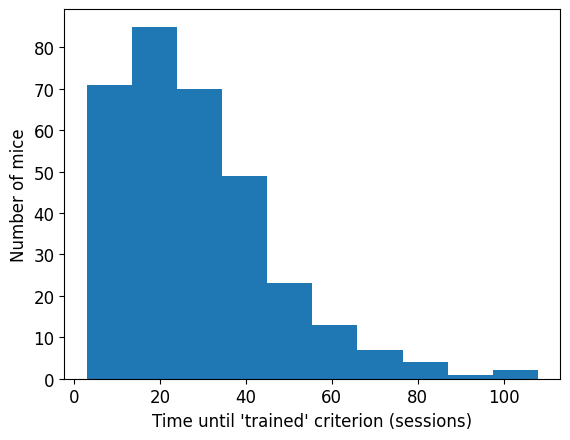

In [24]:
plt.hist(use_data['training_time'])
plt.xlabel("Time until 'trained' criterion (sessions)")
plt.ylabel('Number of mice')
plt.rc('font', size=12)